In [1]:
import requests
import pandas as pd
from requests.models import Response


companies = requests.get(f'https://fmpcloud.io/api/v3/stock-screener?sector=technology&marketCapMoreThan=10000000000&limit=100&apikey=e4068bb3a2b324da737038d3084bdbc9')
companies = companies.json()

fin_comps = []

for comp in companies:
    fin_comps.append(comp['symbol'])


'''
Firm Profitability
    Gross Profit Margin = Gross Profit on Sales / Net Sales
    Return on Sales = Net Income / Net Sales
    Asset Turnover = Net Sales / Average Total Assets
    Return on Assets = Net Income / Average Total Assets
    Return on Stockholders' Equity = Net Income / Average Stockholders Equity

Short Term Firm Liquidity
    Working Capital = Current Assets - Current Liabilities
    Current Ratio = Current Assets / Current Liabilities
    Quick Ratio = (Current Assets - Inventory) / Current Liabilities
    Operating-Cash-Flow-to-Current Liabilities Ratio = Cash Flow from Operating Activities / Average Current Liabilities
    Accounts Receivable Turnover = Net Sales / Average Accounts Receivable (net)
    Average Collection Period = 365 / Accounts Receivable Turnover (net)
    Inventory Turnover = Cost of Goods Sold / Average Inventory
    Days' Sale in Inventory = 365 / Inventory Turnover

Long Term Solvency
    Debt-to-Equity-Ratio = Total Liabilities / Total Stockholders' Equity
    Times-Interest-Earned Ratio = Income before Interest Expense and Income Taxes / Interest Expense
    Operating-Cash-Flow-to-Capital-Expenditures Ratio = Cash Flow from Operating Activities / Annual Net Capital Expenditures

Common Stockholders
    Earnings per Share = (Net Income - Preferred Stock Dividends) / Weighted Average Number of Common Shares Outstanding
    Price-Earnings Ratio = Market Price per Share / Earnings per Share
    Dividend Yield = Annual Dividend per Share / Market Price per Share
    Dividend Payout Ratio = Annual Dividend per Share / Earnings per Share
'''




"\nFirm Profitability\n    Gross Profit Margin = Gross Profit on Sales / Net Sales\n    Return on Sales = Net Income / Net Sales\n    Asset Turnover = Net Sales / Average Total Assets\n    Return on Assets = Net Income / Average Total Assets\n    Return on Stockholders' Equity = Net Income / Average Stockholders Equity\n\nShort Term Firm Liquidity\n    Working Capital = Current Assets - Current Liabilities\n    Current Ratio = Current Assets / Current Liabilities\n    Quick Ratio = (Current Assets - Inventory) / Current Liabilities\n    Operating-Cash-Flow-to-Current Liabilities Ratio = Cash Flow from Operating Activities / Average Current Liabilities\n    Accounts Receivable Turnover = Net Sales / Average Accounts Receivable (net)\n    Average Collection Period = 365 / Accounts Receivable Turnover (net)\n    Inventory Turnover = Cost of Goods Sold / Average Inventory\n    Days' Sale in Inventory = 365 / Inventory Turnover\n\nLong Term Solvency\n    Debt-to-Equity-Ratio = Total Liabili

In [26]:
tech_sector = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'ADBE', 'ORCL', 'IBM', 'DELL', 'PLTR', 'INTC']
metrics={}
for company in tech_sector:
    try:
        balance_sheet = requests.get(f'https://fmpcloud.io/api/v3/balance-sheet-statement/{company}?apikey=e4068bb3a2b324da737038d3084bdbc9')
        balance_sheet = balance_sheet.json()

        income_statement = requests.get(f'https://fmpcloud.io/api/v3/income-statement/{company}?apikey=e4068bb3a2b324da737038d3084bdbc9')
        income_statement = income_statement.json()

        cash_flow_statement = requests.get(f'https://fmpcloud.io/api/v3/cash-flow-statement/{company}?apikey=e4068bb3a2b324da737038d3084bdbc9')
        cash_flow_statement = cash_flow_statement.json()

        market_cap = requests.get(f'https://fmpcloud.io/api/v3/market-capitalization/{company}?apikey=e4068bb3a2b324da737038d3084bdbc9')
        market_cap = market_cap.json()
        market_cap = market_cap[0]['marketCap']

        company_data = requests.get(f'https://fmpcloud.io/api/v3/profile/{company}?apikey=e4068bb3a2b324da737038d3084bdbc9').json()
        price = company_data[0]['price']
        annual_div = company_data[0]['lastDiv']



        gross_profit_margin = (income_statement[0]['revenue'] - income_statement[0]['costOfRevenue'])/income_statement[0]['revenue']
        return_on_sales = income_statement[0]['netIncome']/income_statement[0]['revenue']
        asset_turnover = income_statement[0]['revenue']/((balance_sheet[0]['totalAssets']+balance_sheet[1]['totalAssets'])/2)
        return_on_assets = income_statement[0]['netIncome']/((balance_sheet[0]['totalAssets']+balance_sheet[1]['totalAssets'])/2)
        return_on_equity = income_statement[0]['netIncome']/((balance_sheet[0]['totalStockholdersEquity']+balance_sheet[1]['totalStockholdersEquity'])/2)

        working_capital = balance_sheet[0]['totalCurrentAssets'] - balance_sheet[0]['totalCurrentLiabilities']
        current_ratio = balance_sheet[0]['totalCurrentAssets']/balance_sheet[0]['totalCurrentLiabilities']
        quick_ratio = (balance_sheet[0]['totalCurrentAssets'] - balance_sheet[0]['inventory'])/balance_sheet[0]['totalCurrentLiabilities']
        operatingCF_to_currentLiabilities = cash_flow_statement[0]['netCashProvidedByOperatingActivities']/((balance_sheet[0]['totalCurrentLiabilities'] + balance_sheet[1]['totalCurrentLiabilities'])/2)
        AR_turnover = income_statement[0]['revenue']/((balance_sheet[0]['netReceivables'] + balance_sheet[1]['netReceivables'])/2)
        avg_collect_period = 365 / AR_turnover
        

        debt_to_equity = balance_sheet[0]['totalLiabilities']/balance_sheet[0]['totalStockholdersEquity']
        operatingCF_to_CAPEX = cash_flow_statement[0]['netCashProvidedByOperatingActivities']/cash_flow_statement[0]['capitalExpenditure']

        earnings_per_share = income_statement[0]['eps']
        price_to_sales = market_cap/income_statement[0]['revenue']
        price_to_earnings = market_cap/(income_statement[0]['netIncome'])
        dividend_yield = annual_div/price
        dividend_payout = annual_div / earnings_per_share

        metrics[company] = {}
        metrics[company]['Gross Profit Margin'] = (gross_profit_margin*100)
        metrics[company]['Return on Sales'] = (return_on_sales*100)
        metrics[company]['Asset Turnover'] = asset_turnover
        metrics[company]['Return on Assets'] = (return_on_assets*100)
        metrics[company]['Return on Stockholders Equity'] = (return_on_equity*100)
        metrics[company]['Working Capital'] = working_capital
        metrics[company]['Current Ratio'] = current_ratio
        metrics[company]['Quick Ratio'] = quick_ratio
        metrics[company]['OCF-to-CurrentLiabilities'] = operatingCF_to_currentLiabilities
        metrics[company]['AR Turnover'] = AR_turnover
        metrics[company]['Average Collection Period'] = avg_collect_period
        metrics[company]['Debt-to-Equity-Ratio'] = debt_to_equity
        metrics[company]['OCF-to-CAPEX'] = operatingCF_to_CAPEX
        metrics[company]['Earnings per Share'] = earnings_per_share
        metrics[company]['Price to Sales'] = price_to_sales
        metrics[company]['Price to Earnings'] = price_to_earnings
        metrics[company]['Dividend Yield'] = dividend_yield
        metrics[company]['Dividend Payout'] = dividend_payout
    
    except:
        pass
metrics


{'AAPL': {'Gross Profit Margin': 38.23324772781086,
  'Return on Sales': 20.913611278072235,
  'Asset Turnover': 0.8288446325807212,
  'Return on Assets': 17.33413445570981,
  'Return on Stockholders Equity': 73.68556155223422,
  'Working Capital': 38321000000,
  'Current Ratio': 1.3636044481554577,
  'Quick Ratio': 1.325072111735236,
  'OCF-to-CurrentLiabilities': 0.7642840225474871,
  'AR Turnover': 8.866190814546863,
  'Average Collection Period': 41.16762289856656,
  'Debt-to-Equity-Ratio': 3.957039440456695,
  'OCF-to-CAPEX': 11.037624846080176,
  'Earnings per Share': 3.31,
  'Price to Sales': 8.16533870183909,
  'Price to Earnings': 39.04317907257072,
  'Dividend Yield': 0.011129802049917845,
  'Dividend Payout': 0.42975830815709964},
 'MSFT': {'Gross Profit Margin': 67.78100199279797,
  'Return on Sales': 30.962486452470024,
  'Asset Turnover': 0.4865556324814967,
  'Return on Assets': 15.064972179081323,
  'Return on Stockholders Equity': 40.1397790005167,
  'Working Capital':

In [27]:
tech_df = pd.DataFrame.from_dict(metrics, orient='index')
tech_df = tech_df.T



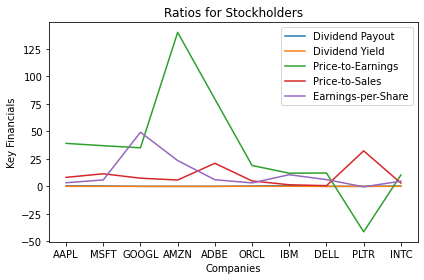

In [35]:
import matplotlib.pyplot as plt


plt.figure(figsize=(200,100))
%matplotlib inline

#line1
x1 = tech_df.columns
y1 = tech_df.iloc[17,]
plt.plot(x1,y1, label = 'Dividend Payout')
#line2
x2 = tech_df.columns
y2 = tech_df.iloc[16,]
plt.plot(x2,y2, label = 'Dividend Yield')
#line3
x3 = tech_df.columns
y3 = tech_df.iloc[15,]
plt.plot(x3,y3, label = 'Price-to-Earnings')
#line4
x4 = tech_df.columns
y4 = tech_df.iloc[14,]
plt.plot(x4,y4, label = 'Price-to-Sales')
#line5
x5 = tech_df.columns
y5 = tech_df.iloc[13,]
plt.plot(x5,y5, label = 'Earnings-per-Share')

plt.xlabel('Companies')
plt.ylabel('Key Financials')
plt.title('Ratios for Stockholders')

plt.legend()
plt.tight_layout()
plt.show()

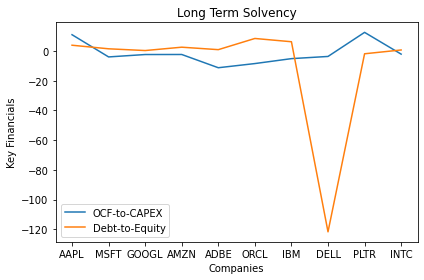

In [30]:
import matplotlib.pyplot as plt


plt.figure(figsize=(200,100))
%matplotlib inline

#line1
x1 = tech_df.columns
y1 = tech_df.iloc[12,]
plt.plot(x1,y1, label = 'OCF-to-CAPEX')
#line2
x2 = tech_df.columns
y2 = tech_df.iloc[11,]
plt.plot(x2,y2, label = 'Debt-to-Equity')


plt.xlabel('Companies')
plt.ylabel('Key Financials')
plt.title('Long Term Solvency')

plt.legend()
plt.tight_layout()
plt.show()

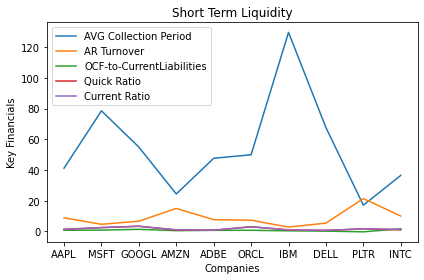

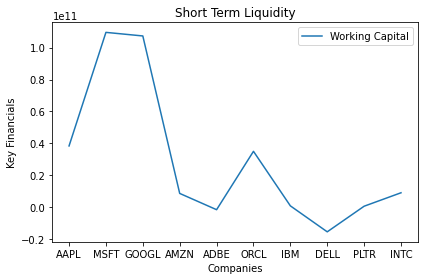

In [32]:
plt.figure(figsize=(200,100))
%matplotlib inline

#line1
x1 = tech_df.columns
y1 = tech_df.iloc[10,]
plt.plot(x1,y1, label = 'AVG Collection Period')
#line2
x2 = tech_df.columns
y2 = tech_df.iloc[9,]
plt.plot(x2,y2, label = 'AR Turnover')
#line3
x3 = tech_df.columns
y3 = tech_df.iloc[8,]
plt.plot(x3,y3, label = 'OCF-to-CurrentLiabilities')
#line4
x4 = tech_df.columns
y4 = tech_df.iloc[7,]
plt.plot(x4,y4, label = 'Quick Ratio')
#line5
x5 = tech_df.columns
y5 = tech_df.iloc[6,]
plt.plot(x5,y5, label = 'Current Ratio')

plt.xlabel('Companies')
plt.ylabel('Key Financials')
plt.title('Short Term Liquidity')

plt.legend()
plt.tight_layout()
plt.show()



plt.figure(figsize=(200,100))
%matplotlib inline

#line6
x6 = tech_df.columns
y6 = tech_df.iloc[5,]
plt.plot(x6,y6, label = 'Working Capital')

plt.xlabel('Companies')
plt.ylabel('Key Financials')
plt.title('Short Term Liquidity')

plt.legend()
plt.tight_layout()
plt.show()


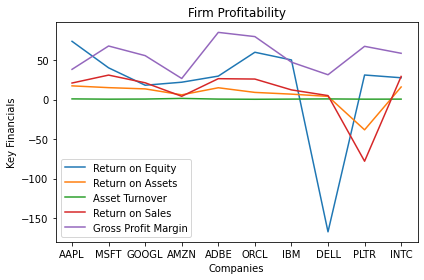

In [34]:
import matplotlib.pyplot as plt


plt.figure(figsize=(200,100))
%matplotlib inline

#line1
x1 = tech_df.columns
y1 = tech_df.iloc[4,]
plt.plot(x1,y1, label = 'Return on Equity')
#line2
x2 = tech_df.columns
y2 = tech_df.iloc[3,]
plt.plot(x2,y2, label = 'Return on Assets')
#line3
x3 = tech_df.columns
y3 = tech_df.iloc[2,]
plt.plot(x3,y3, label = 'Asset Turnover')
#line4
x4 = tech_df.columns
y4 = tech_df.iloc[1,]
plt.plot(x4,y4, label = 'Return on Sales')
#line5
x5 = tech_df.columns
y5 = tech_df.iloc[0,]
plt.plot(x5,y5, label = 'Gross Profit Margin')

plt.xlabel('Companies')
plt.ylabel('Key Financials')
plt.title('Firm Profitability')

plt.legend()
plt.tight_layout()
plt.show()